In [46]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from sklearn import manifold, datasets, metrics
from sklearn.manifold import TSNE
from sklearn import svm
import pandas as pd

In [44]:
n = 1500
digits = datasets.load_digits()
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:n], digits.target[:n])
expected = digits.target[n:]
predicted = clf.predict(digits.data[n:])
prediction = clf.predict(digits.data[n:]) - digits.target[n:]

errors_boolean = prediction != 0
errors = errors_boolean.astype(int)

# print(digits.target[n:])
# print(prediction)
# print(errors)

dict_ = {"true":digits.target[n:],"predicted":clf.predict(digits.data[n:]),"error":errors}
df = pd.DataFrame(dict_)
print(df[df.error == 1].sort_values(['predicted', 'true']))

     error  predicted  true
53       1          1     8
71       1          1     8
73       1          4     0
229      1          5     3
265      1          5     3
162      1          5     9
102      1          8     3
190      1          8     3
226      1          8     3
227      1          8     3
158      1          8     9
111      1          9     4
128      1          9     4
160      1          9     4


In [56]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [57]:
conf_matrix = metrics.confusion_matrix(expected, predicted)
classes = digits.target_names

Confusion matrix, without normalization
[[26  0  0  0  1  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  2  0  0  4  0]
 [ 0  0  0  0 30  0  0  0  0  3]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  2  0  0  0  0  0  0 26  0]
 [ 0  0  0  0  0  1  0  0  1 29]]


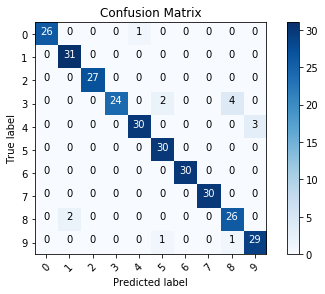

In [58]:
plt.figure()
plot_confusion_matrix(conf_matrix, classes=classes, title='Confusion Matrix')

5


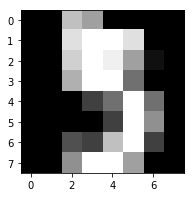

In [86]:
figsize(5,3)
num = 5
plt.imshow(digits.data[num].reshape(8,8), cmap="gray") #, interpolation="bessel")
print(digits.target[num])

# Can we do t-sne on the data?

In [72]:
samples = digits.data[:]
labels = digits.target[:]

# Take the first 500 data points: it's hard to see 1500 points
x = digits.data[:500]
y = digits.target[:500]

n_samples, n_features = x.shape
print(x.shape)

(500, 64)


In [37]:
?manifold.TSNE

In [73]:
# model = manifold.TSNE(learning_rate=100)
model = manifold.TSNE(perplexity=50,n_components=2, init='pca', random_state=0)
# tsne = TSNE(n_components=2, random_state=0)
%time transformed = model.fit_transform(samples)

CPU times: user 1min 13s, sys: 8.68 s, total: 1min 21s
Wall time: 1min 26s


In [74]:
xs = transformed[:,0]
ys = transformed[:,1]

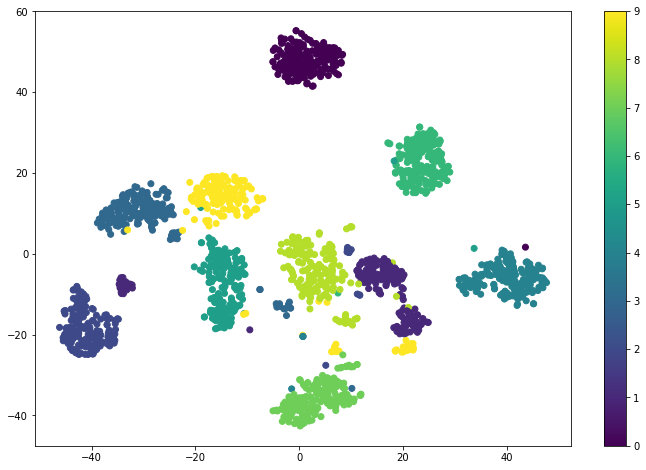

In [75]:
figsize(12,8)

fig, ax = plt.subplots()
sct = plt.scatter(xs, ys, c=labels)
fig.colorbar(sct)
# plt.legend()

# Plot with the colours categorical not continuous
https://www.scipy-lectures.org/packages/scikit-learn/auto_examples/plot_tsne.html

In [76]:
# create categories (LIKE FACTORS IN R) for each digit
target_ids = range(len(digits.target_names))
colors = ('r', 'g', 'b', 'c', 'm', 'y', 'lightgray', 'black', 'orange', 'purple')
target_labels = digits.target_names

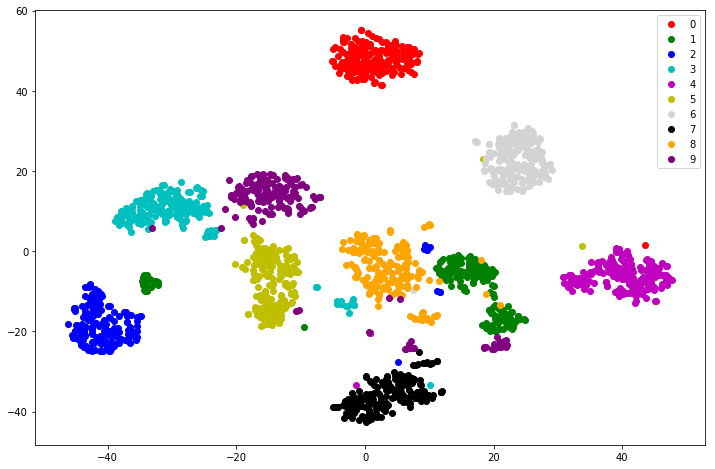

In [77]:
for i, c, label in zip(target_ids, colors, target_labels):
    # i = 0, c = r, label = 0
    # i == LEVEL of the factor 1-10
    
    # get the x-coords of the points == i
    x_vals = transformed[labels == i, 0]
    # get the y-coords of the points == i
    y_vals = transformed[labels == i, 1]
    plt.scatter(x_vals, y_vals, c=c, label=label)
plt.legend()
plt.show()

# Plot with groups labelled
https://github.com/oreillymedia/t-SNE-tutorial

In [80]:
X = np.vstack([digits.data[:500][digits.target[:500]==i]
               for i in range(10)])
y = np.hstack([digits.target[:500][digits.target[:500]==i]
               for i in range(10)])
%time transformed_1 = model.fit_transform(X)

In [84]:
import seaborn as sns
import matplotlib.patheffects as PathEffects

def scatter(tsne_transformed, labels):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(tsne_transformed[:,0], tsne_transformed[:,1], lw=0, s=40,
                    c=palette[labels.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(tsne_transformed[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

[0 1 2 3 4 5 6 7 8 9]


/Users/TommyLees/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 500 but corresponding boolean dimension is 10


(<matplotlib.figure.Figure at 0x1a19f71940>,
  <matplotlib.text.Text at 0x1080af2e8>])

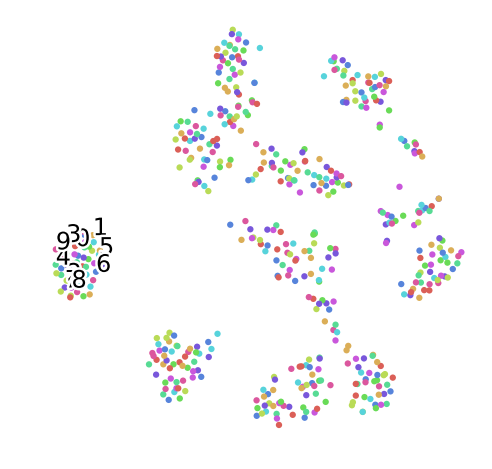

In [85]:
labels = unique(digits.target_names)
scatter(transformed, labels)

In [23]:
len(y)

500

In [ ]:
X_2d = tsne.fit_transform(X)

In [ ]:
# crate categories for each digit
target_ids = range(len(digits.target_names))
# create a tuple of colors
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
target_labels = digits.target_names

plt.figure(figsize=(6, 5))
for i, c, label in zip(target_ids, colors, target_labels):
    # i = 0, c = r, label = 0
    # get the x-coords of the points == i
    x_vals = X_2d[y == i, 0]
    # get the y-coords of the points == i
    y_vals = X_2d[y == i, 1]
    plt.scatter(x_vals, y_vals, c=c, label=label)
plt.legend()
plt.show()

In [ ]:
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
target_ids = range(len(digits.target_names))
zip_object = zip(target_ids, colors, digits.target_names)
zip_object

In [ ]:
for i, c, label in zip(target_ids, colors, digits.target_names):
    print(i, c, label)
    